In [82]:
# !pip install pandas numpy seaborn matplotlib klib dtable scikit-learn joblib

In [83]:
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



In [84]:
file_path = "D:/Github/Major-Project-Sales-Analysis/Online Retail.xlsx"
df = pd.read_excel(file_path)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [86]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [87]:
#checking what is null in each null rows
rows_with_na = df[df.isna().any(axis=1)]
rows_with_na.head(100)

# removing the null values
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [88]:
# droping the country column
df.drop(columns=['Country'],inplace=True)

In [89]:
df.duplicated().sum()

5225

In [90]:
# Creating another data Frame for cecking duplicate values in the original DataFrame

duplicate_values = df[df.duplicated()]
duplicate_values.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0


In [91]:
aggregated_df = df.groupby(['InvoiceNo', 'Description'], as_index=False)['Quantity'].sum()
aggregated_df.head()

,InvoiceNo,Description,Quantity
0,536365,CREAM CUPID HEARTS COAT HANGER,8
1,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6
2,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6
3,536365,RED WOOLLY HOTTIE WHITE HEART.,6
4,536365,SET 7 BABUSHKA NESTING BOXES,2


In [92]:
# checking with specific invoiceNo if there is any data Duplication 

invoice_item_536412 = aggregated_df[aggregated_df['InvoiceNo'] == 536412]
invoice_item_536412

,InvoiceNo,Description,Quantity
524,536412,SET 2 TEA TOWELS I LOVE LONDON,4
525,536412,12 DAISY PEGS IN WOOD BOX,8
526,536412,5 HOOK HANGER MAGIC TOADSTOOL,5
527,536412,5 HOOK HANGER RED MAGIC TOADSTOOL,10
528,536412,6 RIBBONS RUSTIC CHARM,10
529,536412,BABUSHKA LIGHTS STRING OF 10,2
530,536412,BLUE POLKADOT PLATE,1
531,536412,CHRISTMAS CRAFT LITTLE FRIENDS,3
532,536412,CHRISTMAS CRAFT TREE TOP ANGEL,2
533,536412,COSY SLIPPER SHOES SMALL RED,8


In [93]:
'''
Merging the aggregated dataframe with the original DataFrame.
Adding a additional column as quantity_agg that will give us total item bought in single invoice of specific stockNo
Then Deleting the duplicate rows of similar product name.

'''
df = df.merge(aggregated_df, on=['InvoiceNo','Description'], suffixes=('','_agg'), how='left')

df.drop_duplicates(['InvoiceNo','Description'], keep='first', inplace=True)

# df.duplicated().sum()

In [94]:
df.drop(columns=['Quantity'],inplace=True)

In [95]:
# Check 

invoice_item_536412 = df[df['InvoiceNo'] == 536412]
invoice_item_536412

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Quantity_agg
541,536412,20728,LUNCH BAG CARS BLUE,2010-12-01 11:49:00,1.65,17920.0,3
542,536412,22382,LUNCH BAG SPACEBOY DESIGN,2010-12-01 11:49:00,1.65,17920.0,3
543,536412,22326,ROUND SNACK BOXES SET OF4 WOODLAND,2010-12-01 11:49:00,2.95,17920.0,1
544,536412,22662,LUNCH BAG DOLLY GIRL DESIGN,2010-12-01 11:49:00,1.65,17920.0,4
545,536412,22383,LUNCH BAG SUKI DESIGN,2010-12-01 11:49:00,1.65,17920.0,3
546,536412,20727,LUNCH BAG BLACK SKULL.,2010-12-01 11:49:00,1.65,17920.0,3
547,536412,22328,ROUND SNACK BOXES SET OF 4 FRUITS,2010-12-01 11:49:00,2.95,17920.0,1
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,2010-12-01 11:49:00,2.95,17920.0,2
549,536412,22630,DOLLY GIRL LUNCH BOX,2010-12-01 11:49:00,1.95,17920.0,1
550,536412,22629,SPACEBOY LUNCH BOX,2010-12-01 11:49:00,1.95,17920.0,1


In [96]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Quantity_agg
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850.0,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850.0,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850.0,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850.0,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850.0,6


In [97]:
df.info()
df.describe()

# df['IsCancelled'] = df['InvoiceNo'].str.startswith('c').astype(bool)
# df = df[~df['IsCancelled']]
# df.reset_index(drop=False, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396577 entries, 0 to 406828
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     396577 non-null  object        
 1   StockCode     396577 non-null  object        
 2   Description   396577 non-null  object        
 3   InvoiceDate   396577 non-null  datetime64[ns]
 4   UnitPrice     396577 non-null  float64       
 5   CustomerID    396577 non-null  float64       
 6   Quantity_agg  396577 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 24.2+ MB


,UnitPrice,CustomerID,Quantity_agg
count,396577.000000,396577.000000,396577.000000
mean,3.455172,15275.496269,12.373103
std,69.761845,1714.292253,251.934375
min,0.000000,12346.000000,-80995.000000
25%,1.250000,13923.000000,2.000000
50%,1.950000,15133.000000,6.000000
75%,3.750000,16779.000000,12.000000
max,38970.000000,18287.000000,80995.000000


In [98]:
df['IsCancelled'] = df['InvoiceNo'].str.startswith('c').astype(bool)
cancelled_data = df[~df['IsCancelled']]
# cancelled_data

df = df[df['IsCancelled']]
df.reset_index(drop=True, inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387772 entries, 0 to 387771
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     387772 non-null  object        
 1   StockCode     387772 non-null  object        
 2   Description   387772 non-null  object        
 3   InvoiceDate   387772 non-null  datetime64[ns]
 4   UnitPrice     387772 non-null  float64       
 5   CustomerID    387772 non-null  float64       
 6   Quantity_agg  387772 non-null  int64         
 7   IsCancelled   387772 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.1+ MB


In [100]:
# df['InvoiceNo'] = df['InvoiceNo'].astype('int64')

# df['Billing Date'] = df['InvoiceDate'].split(" ")[0]

# df['Billing Date']

df['CustomerID'] = df['CustomerID'].astype(int)

In [101]:
df.drop(columns=['IsCancelled'], inplace=True)

df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Quantity_agg
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,2.55,17850,6
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,3.39,17850,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,2.75,17850,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,3.39,17850,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,3.39,17850,6


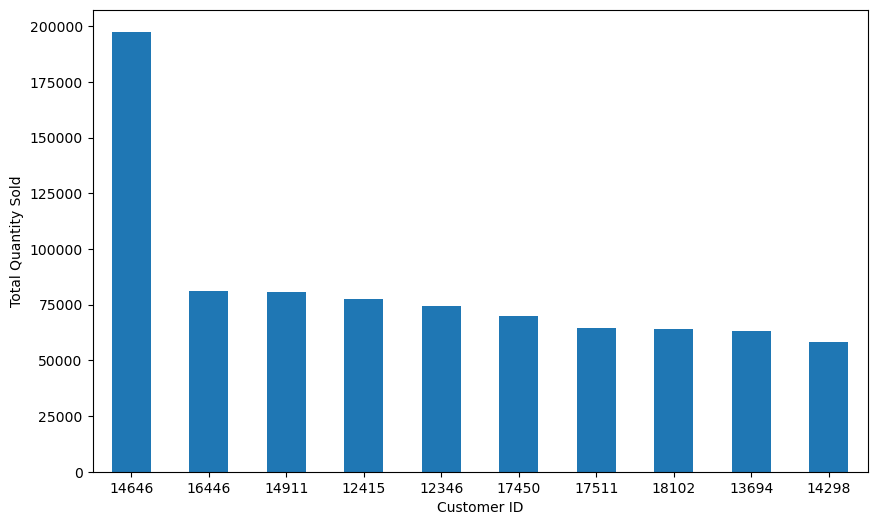

In [102]:
customer_sales = df.groupby('CustomerID')['Quantity_agg'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
customer_sales.head(10).plot(kind='bar',rot=0)
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Sold')
plt.show()